<a href="https://colab.research.google.com/github/BastLast/DeepLearning/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/cszn/DnCNN


https://github.com/SonghyunYu/DIDN


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision import models

import time

torch.manual_seed(1234)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class CustomModel(torch.nn.Module):

  def __init__(self):
    super(LeNet5, self).__init__()
		# initialize first set of CONV => RELU => POOL layers
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=1, padding=2, bias=False)
    self.relu1 = torch.nn.ReLU()
    self.avgpool1 = torch.nn.AvgPool2d(2, stride=2)
    # initialize second set of CONV => RELU => POOL layers
    self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=1, padding=0, bias=False)
    self.relu2 = torch.nn.ReLU()
    self.avgpool2 = torch.nn.AvgPool2d(2, stride=2)
    # initialize third set of CONV => RELU
    self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=1, padding=0, bias=False)
    self.relu3 = torch.nn.ReLU()
    # initialize first set of linear => RELU layers
    self.flatten = torch.nn.Flatten()
    self.f1 = torch.nn.Linear(in_features=120, out_features=84)
    self.relu4 = torch.nn.ReLU()
    # initialize second set of linear
    self.f2 = torch.nn.Linear(in_features=84, out_features=10)
    pass
  
  def forward(self, x):
    """
      :param: x : the image to process ( shape [batch_size, 1, height, width] )
      :return: logits: the unscaled output scores that will be process by the softmax ( shape [batch_size, D_out] )
    """
    # pass the input through our first set of CONV => RELU =>
		# POOL layers
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.avgpool1(x)
    # pass the output from the previous layer through the second
    # set of CONV => RELU => POOL layers
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.avgpool2(x)
    # pass the output from the previous layer through the third
    # set of CONV => RELU => POOL layers
    x = self.conv3(x)
    x = self.relu3(x)
    # flatten the output from the previous layer and pass it
    # through our first set of linear
    x = self.flatten(x)
    x = self.f1(x)
    x = self.relu4(x)
    # pass the output to our second set of linear
    # predictions
    x = self.f2(x)
    # return the output predictions
    return x

In [ ]:
def train_optim(model, device, epochs, log_frequency, learning_rate=1e-4):

  model.to(device) # we make sure the model is on the proper device

  # Multiclass classification setting, we use cross-entropy
  # note that this implementation requires the logits as input 
  # logits: values prior softmax transformation 
  loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  
  for t in range(epochs):

      model.train() # we specify that we are training the model

      start=time.time() #start timer

      # At each epoch, the training set will be processed as a set of batches
      for batch_id,  batch in enumerate(trainloader) : 

        images, labels  = batch

        # we put the data on the same device
        images , labels = images.to(device), labels.to(device)  
        
        y_pred = model(images) # forward pass output=logits

        loss = loss_fn(y_pred, labels)

        if batch_id % log_frequency == 0:
            print("epoch: {:03d}, batch: {:03d}, loss: {:.3f}, time: {:.3f}".format(t+1, batch_id+1, loss.item(),time.time()-start))

        optimizer.zero_grad() # clear the gradient before backward
        loss.backward()       # update the gradient

        optimizer.step() # update the model parameters using the gradient

      # Model evaluation after each step computing the accuracy
      model.eval()
      total = 0
      correct = 0
      for batch_id, batch in enumerate(testloader):
        images , labels = batch
        images , labels = images.to(device), labels.to(device)
        y_pred = model(images) # forward computes the logits
        sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
        _, predicted = torch.max(sf_y_pred , 1)     # decision rule, we select the max
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Première réflexion :

Notre première liste de stratégies pour le challenge numéro 1 est la suivante :

- CNN simple

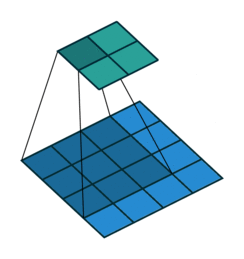

- CNN avec dilation

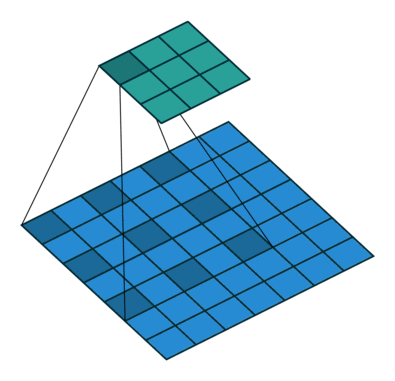

Notre théorie est que cette stratégie serait plus efficace sur les images fortement altérées

- Utiliser un modèle existant (DRU net nous semble interessant en première instance)

- Nous serions également curieux de savoir quel seraient les performance sur les images peu dégradées d'un modèle entrainé sur des images fortement dégradées
et inversement.

**Crédit des illustrations :** https://github.com/vdumoulin/conv_arithmetic